# Difusión en una dimensión

In [1]:
%matplotlib inline

In [2]:
import scipy as np
from matplotlib import pyplot as plt

## Parámetros

In [3]:
data = np.loadtxt('initial_f.csv' , delimiter=',' )

In [4]:
x = data[ : , 0 ]
u0 = data[ : , 1 ]

In [7]:
L  = x[-1] - x[0]      # longitud del sistema 1D
nx = x.size            # nodos espaciales
dx = x[ 1] - x[0]      # equiespaciados

T= 1            # tiempo total
nt = 200            # pasos temporales
dt = T / nt

c = 1              # velocidad de la onda

### ¡Número de Courant !

In [9]:
Co = c * dt / dx
Co

0.19999999999999998

### Condiciones iniciales

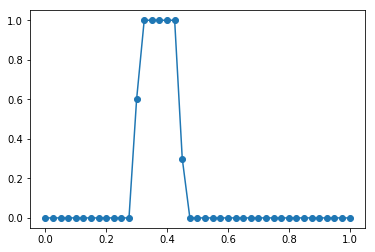

In [10]:
plt.plot( x , u0 , 'o-')

### Un paso en el tiempo

Recordemos que queremos implementar $u_i^{n+1} = u_i^n - \mathrm{Co}/2 (u_{i+1}^n-u_{i-1}^n)$

In [31]:
u = np.zeros( nx + 2  )

In [49]:
u[ 1 : nx +1 ] = u0

In [50]:
nnx = u.size

In [51]:
un = u.copy()         # distribución actual

for i in range( 1 , nx +1 ):    # ojo a los extremos
   u[i] = un[i] + (Co / 2.0) * (un[i+1] + un[i-1] - 2 * un[i] )

        

In [52]:
uf = u[ 1 : nx +1 ]

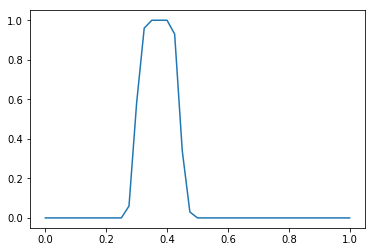

In [54]:
plt.plot( x , uf)

### Tiempo completo

In [55]:
u[ 0 ] = u[ nx + 1 ] = 0
u[ 1 : nx +1 ] = u0

In [56]:

for n in range(100):
    un = u.copy()
    for i in range( 1 , nx +1 ): 
           u[i] = un[i] + (Co / 2.0) * (un[i+1] + un[i-1] - 2 * un[i] )

        

In [57]:
Co

0.19999999999999998

In [59]:
uf = u[ 1 : nx +1 ]

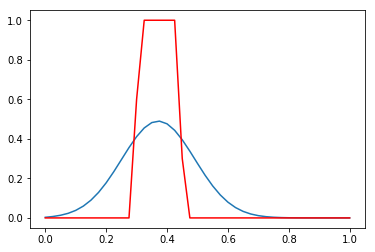

In [60]:
plt.plot(x , uf , x , u0 , 'r')

In [61]:
import scipy.integrate as integrate

In [63]:
integrate.trapz( x, u0)

-0.14749999999999996

In [64]:
integrate.trapz( x, uf)

-0.1473150293774394

### Formulaciones alternativas

¿Qué pasa si probamos el algoritmo "peor"?  $u_i^{n+1} = u_i^n - \mathrm{Co} (u_{i}^n-u_{i-1}^n)$

In [101]:
u = u0.copy()

for n in range(nt):
    un = u.copy()
    for i in range( 0 , nx ): 
        u[i] = un[i] - Co  * (un[i] - un[i-1])
        
        

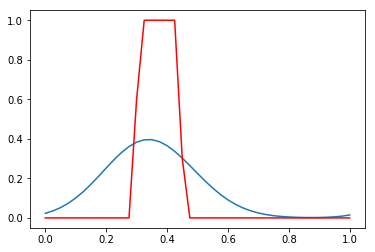

In [102]:
plt.plot(x , u , x , u0 , 'r')

### Reflexiones

* ¿Qué hemos hecho en los bordes? (condiciones de contorno)
* ¿Por qué los algoritmos difieren tantísimo?
* ¿Cuántos parámetros hay realmente? (Pista: 1)
